In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import os

def Pearson(df, name):
    plt.figure(figsize=(15,15))
    cm = np.corrcoef(df.iloc[:,3:8].values.T)
    sns.set(font_scale=1.5)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 25}, cmap='viridis',yticklabels=df.columns[3:8], xticklabels=df.columns[3:8])
    hm.set_title(name)
    plt.show()



In [69]:
df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary_new.csv')
df_mouse_b_enac.shape

(28, 8)

In [91]:
# One more column for genotype
df_mouse_mps = pd.read_csv('mouse_mps_summary.csv')
df_mouse_mps = df_mouse_mps.drop('Genotype', axis=1)
df_mouse_mps.shape

(33, 8)

In [5]:
df_rat_pa = pd.read_csv('rat_pa_summary.csv')
df_rat_pa.shape

(83, 8)

In [6]:
df_rat_sterile_baseline = pd.read_csv('rat_sterile_baseline_summary.csv')
df_rat_sterile_baseline.shape

(51, 8)

In [7]:
df_rat_sterile_post_beads = pd.read_csv('rat_sterile_post_beads_summary.csv')
df_rat_sterile_post_beads.shape

(53, 8)

In [8]:
df_sheep_01_60 = pd.read_csv('sheep_01_60_summary.csv')
df_sheep_01_60.shape

(62, 8)

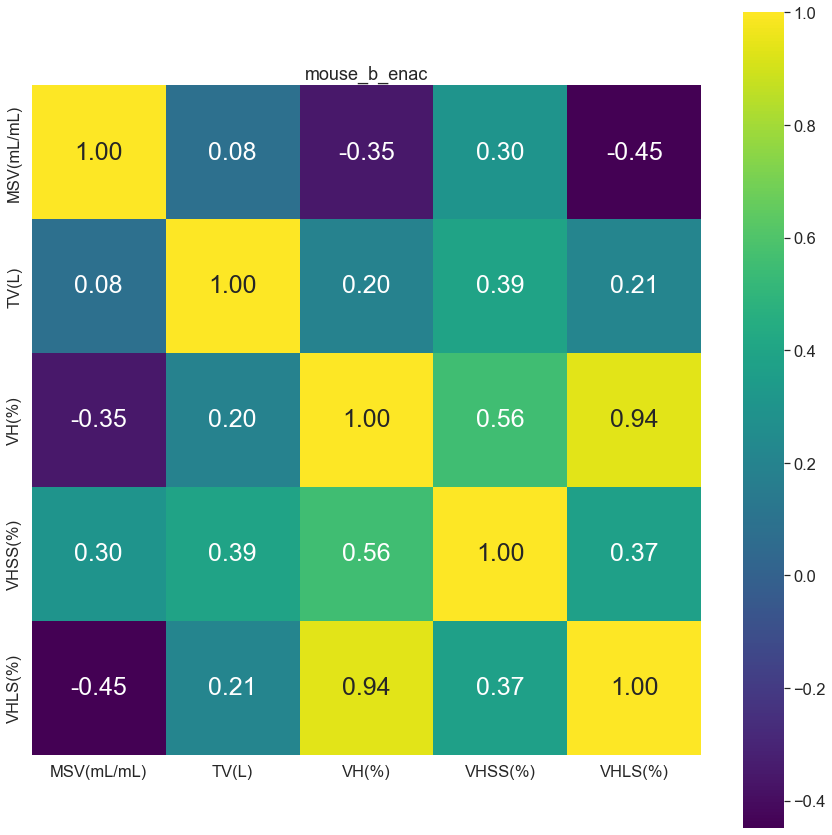

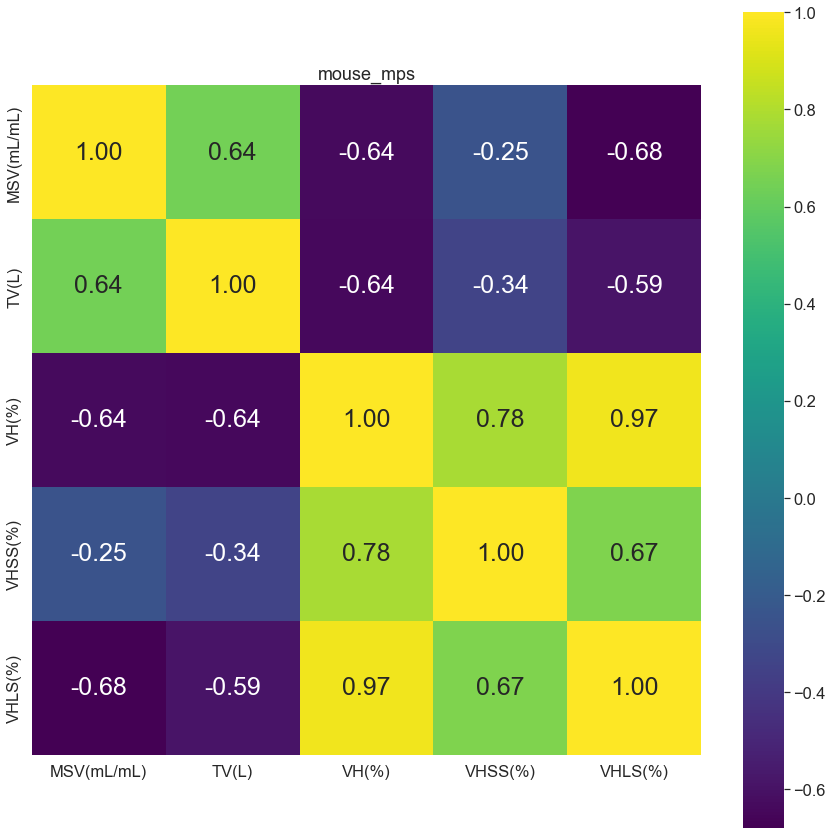

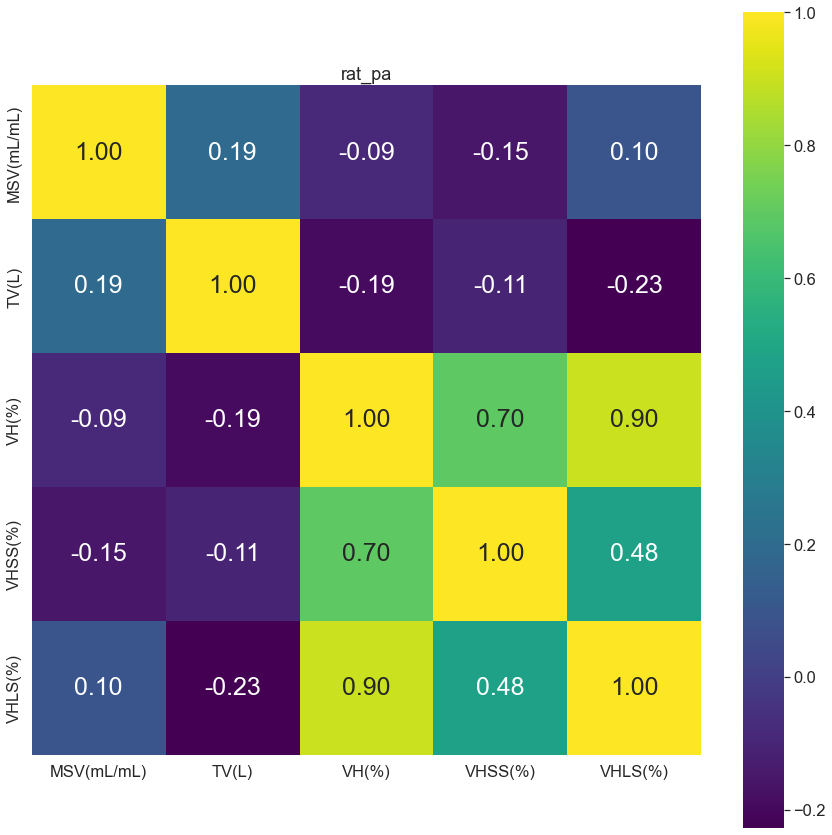

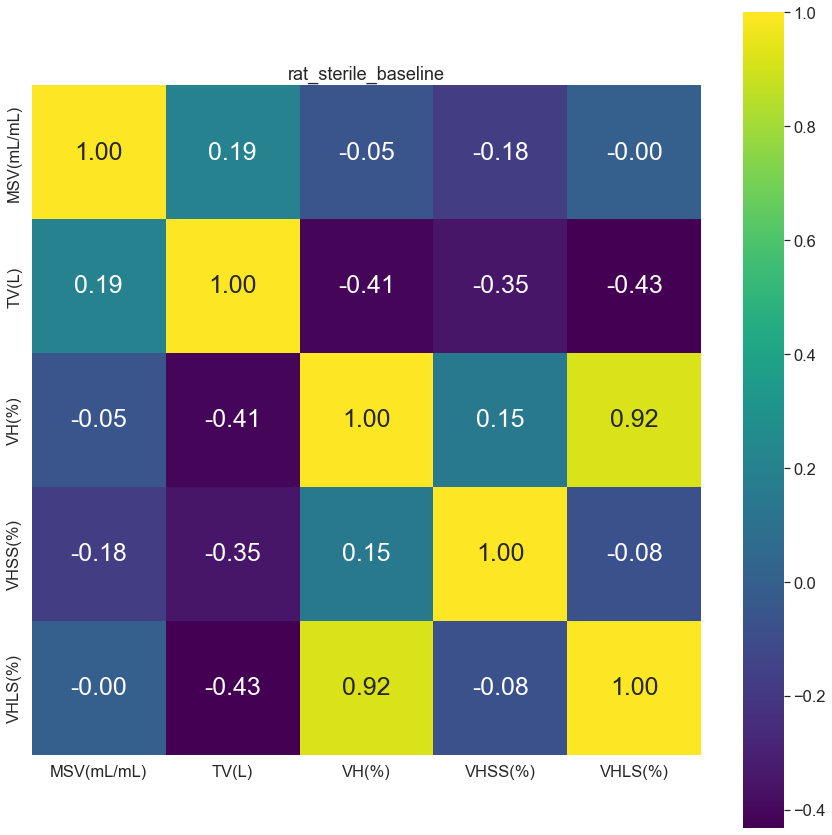

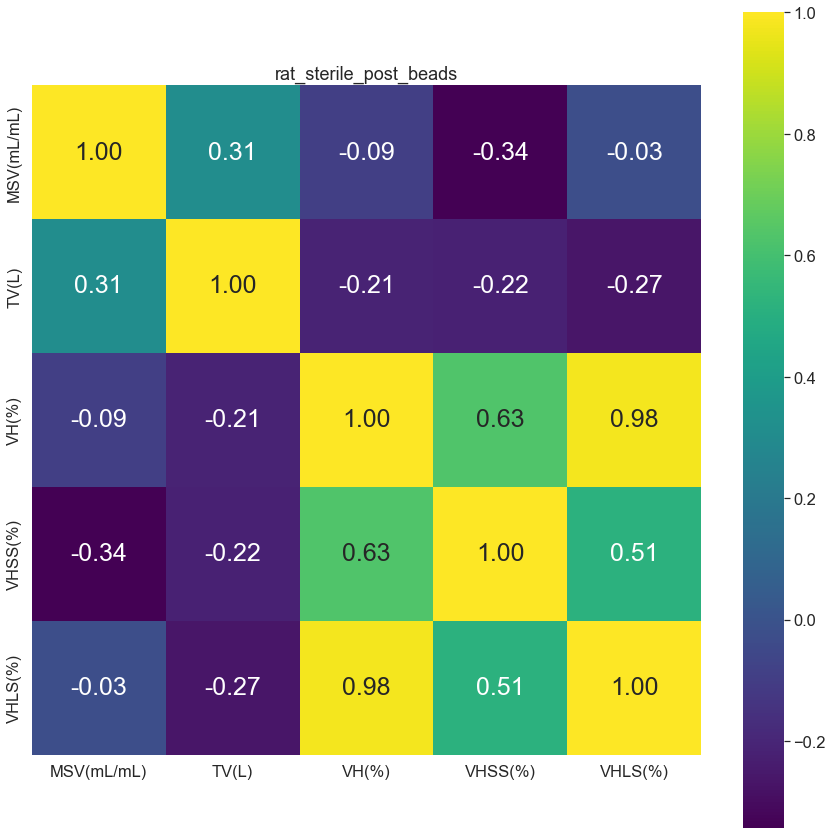

In [12]:
Pearson(df_mouse_b_enac, "mouse_b_enac")
Pearson(df_mouse_mps, "mouse_mps")
Pearson(df_rat_pa, "rat_pa")
Pearson(df_rat_sterile_baseline, "rat_sterile_baseline")
Pearson(df_rat_sterile_post_beads, "rat_sterile_post_beads")


# PCA

# rat baseline vs post beads

In [49]:
def pca(features, labels, title):

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    # Apply PCA with two components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_standardized)

    # Create a new DataFrame with the principal components and class labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['target'] = labels

    # Plot the PCA results
    plt.figure(figsize=(8, 6))
    classes = pca_df['target'].unique()

    for c in classes:
        subset = pca_df[pca_df['target'] == c]
        plt.scatter(subset['PC1'], subset['PC2'], label=c)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

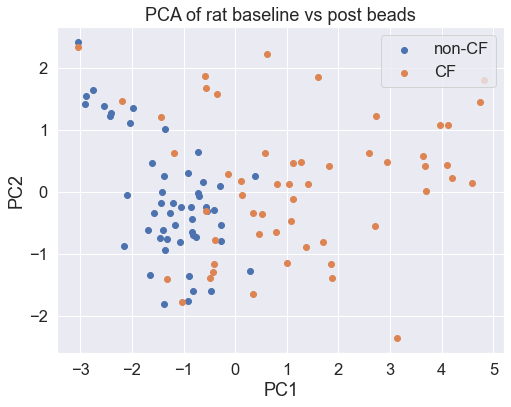

In [54]:
# label the dataframe
df_rat_sterile_baseline['target'] = 'non-CF'
df_rat_sterile_post_beads['target'] = 'CF'

# combine the dataframe
df_rat_combine = pd.concat([df_rat_sterile_baseline, df_rat_sterile_post_beads], ignore_index=True)

# features and labels
features = df_rat_combine.iloc[:,2:8]
labels = df_rat_combine['target']

pca(features, labels, 'PCA of rat baseline vs post beads')

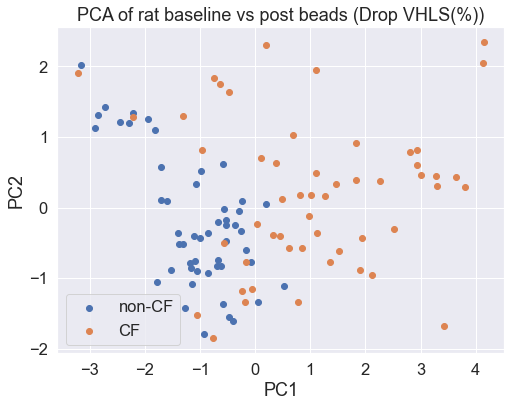

In [55]:
# Drop VHLS(%)
features = df_rat_combine.iloc[:,2:7]
labels = df_rat_combine['target']

pca(features, labels, 'PCA of rat baseline vs post beads (Drop VHLS(%))')

In [ ]:
# label the dataframe
df_rat_sterile_baseline['target'] = 'non-CF'
df_rat_sterile_post_beads['target'] = 'CF'

# combine the dataframe
df_rat_combine = pd.concat([df_rat_sterile_baseline, df_rat_sterile_post_beads], ignore_index=True)

# features and labels
features = df_rat_combine.iloc[:,2:8]
labels = df_rat_combine['target']

pca(features, labels, 'PCA of rat baseline vs post beads')

# Mouse B-Enac vs WT

In [78]:
df_WT = df_mouse_mps[df_mouse_mps['Genotype'] == 'WT']
df_MPS_I = df_mouse_mps[df_mouse_mps['Genotype'] == 'MPS I']
df_Het = df_mouse_mps[df_mouse_mps['Genotype'] == 'Het']

df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary_new.csv')
df_mouse_b_enac.insert(1, 'Genotype', 'B-Enac')

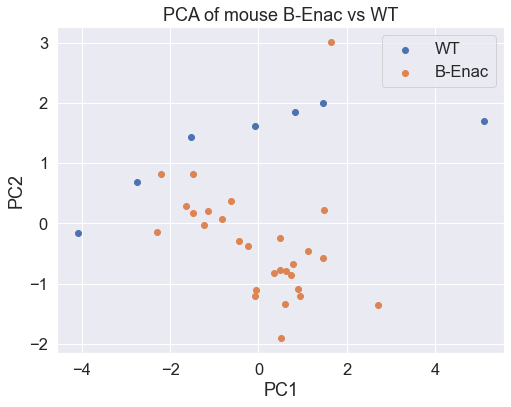

In [88]:
# combine the dataframe
df_mouse_combine = pd.concat([df_WT, df_mouse_b_enac], ignore_index=True)

# features and labels
features = df_mouse_combine.iloc[:,3:8]
labels = df_mouse_combine['Genotype']

pca(features, labels, 'PCA of mouse B-Enac vs WT')

# Mouse MPS_I vs WT

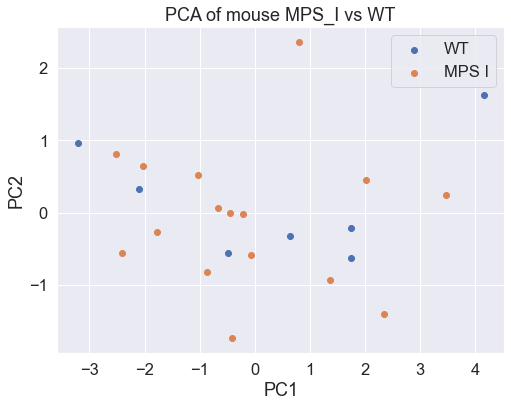

In [89]:
# combine the dataframe
df_mouse_combine = pd.concat([df_WT, df_MPS_I], ignore_index=True)

# features and labels
features = df_mouse_combine.iloc[:,3:8]
labels = df_mouse_combine['Genotype']

pca(features, labels, 'PCA of mouse MPS_I vs WT')